In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, classification_report, accuracy_score
import joblib
import shap


In [3]:
# Load processed data
merged_df = pd.read_csv('../data/processed/merged_data.csv')

In [4]:
# Prepare features and target
X = merged_df.drop(columns=['Delinquent_Acc', 'Week_Start_Date', 'Client_Num'])
y = merged_df['Delinquent_Acc']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer  # Import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('E:\Python\Credit_Card_Financial_PBI\data\processed\merged_data.csv')

# Drop irrelevant columns
df = df.drop(columns=['Week_Start_Date', 'Client_Num'])

# Separate features and target
X = df.drop(columns=['Delinquent_Acc'])
y = df['Delinquent_Acc']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Week_Num', 'Qtr', 'Transaction_ID', 'Gender', 'Education_Level',
       'Marital_Status', 'state_cd', 'Car_Owner', 'House_Owner',
       'Personal_loan', 'contact', 'Customer_Job', 'Utilization_Ratio_Bucket'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

Data types after encoding:
Annual_Fees                          int64
Activation_30_Days                   int64
Customer_Acq_Cost                    int64
current_year                         int64
Credit_Limit                       float64
                                    ...   
Customer_Job_Retirees                 bool
Customer_Job_Selfemployeed            bool
Customer_Job_White-collar             bool
Utilization_Ratio_Bucket_Low          bool
Utilization_Ratio_Bucket_Medium       bool
Length: 10234, dtype: object
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1897
           1       0.00      0.00      0.00       125

    accuracy                           0.94      2022
   macro avg       0.47      0.50      0.48      2022
weighted avg       0.88      0.94      0.91      2022

Confusion Matrix:
[[1897    0]
 [ 125    0]]
Accuracy: 0.9381800197823936


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

<Figure size 640x480 with 0 Axes>

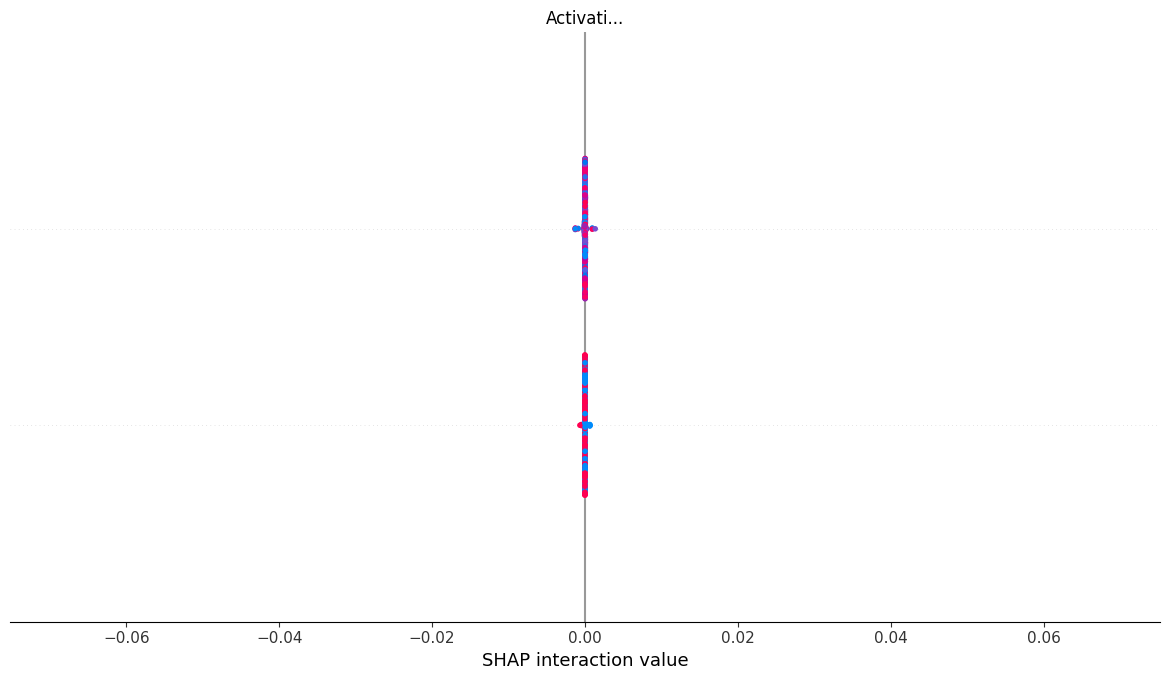

In [ ]:
# Apply OneHotEncoder to categorical columns
if len(categorical_cols) > 0:
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Ensure all columns are numeric
print("Data types after encoding:")
print(X.dtypes)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier with reduced complexity
rf = RandomForestClassifier(
    n_estimators=50,  # Reduce the number of trees
    max_depth=10,     # Limit the depth of trees
    n_jobs=-1,        # Use all CPU cores for parallel processing
    random_state=42
)
rf.fit(X_train, y_train)

# Evaluate model
y_pred = rf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Save model
joblib.dump(rf, 'E:/Python/Credit_Card_Financial_PBI/models/delinquency_model.pkl')

# SHAP explainability (using a subset of the data)
X_train_sample = X_train.sample(n=1000, random_state=42)  # Use a subset of the data

# Ensure all columns are numeric
X_train_sample = X_train_sample.astype(np.float32)

# Create SHAP explainer
explainer = shap.TreeExplainer(rf, data=X_train_sample)
shap_values = explainer.shap_values(X_train_sample, check_additivity=False)

# Plot SHAP summary
plt.figure()
shap.summary_plot(shap_values, X_train_sample, plot_type="bar", show=False)
plt.savefig('E:/Python/Credit_Card_Financial_PBI/reports/delinquency_risk_shap.png')
plt.show()